In [26]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import gym
import numpy as np
import matplotlib.pyplot as plt
from env import Connect4env
import torch
import torch.nn as nn
import sys
from agents import DQN_Agent
env=Connect4env()
l,s=env.reset()

agent1=DQN_Agent(env,batch_size=256,alpha=0.001)
agent2=DQN_Agent(env,batch_size=256,alpha=0.001)

In [27]:
def train_agents_dqn(env:Connect4env,agent1:DQN_Agent,agent2:DQN_Agent,max_episodes:int):

    full_rewards={1:[0],2:[0],0:[0]}
    for ep in range(max_episodes):

        agent1.reset() # reset the epsilons
        agent2.reset()
        
        state,legal_moves=env.reset()
        winner=-1

        while winner==-1:
            if legal_moves ==[]:
                break

            player=env.current_player
            current_agent=agent2 if player==2 else agent1

            action = current_agent.select_action(state, legal_moves)  # Agent take an action based on the model
            next_state, rewards, legal_moves, winner = env.step(action) 
            

            reward=rewards[player]

            # it stores experience and when there is enough it update its parameter by gradient descent

            current_agent.step(state,action,reward,next_state,winner)

            state=next_state

        for players in [1,2,0]:
            if players==winner:
                full_rewards[players].append(full_rewards[players][-1]+1) 
            else:
                if players==0:
                    full_rewards[players].append(full_rewards[players][-1])
                else:
                    full_rewards[players].append(full_rewards[players][-1]-1)

        if ep % 10000 == 0:
            print("\rEpisode {}/{}.".format(ep, max_episodes), end="")
            sys.stdout.flush()
        
    return full_rewards
        

In [28]:
full_r=train_agents_dqn(env,agent1,agent2,10000)

Episode 0/10000.

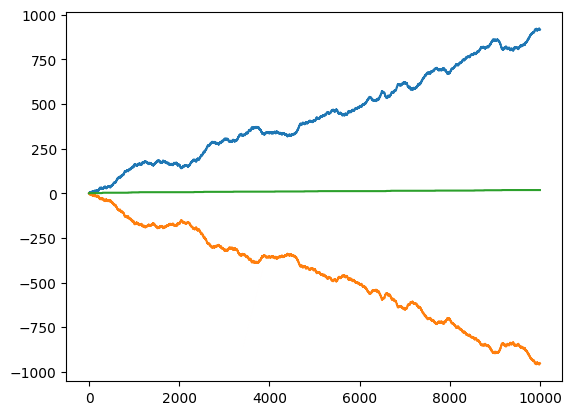

In [29]:
plt.plot(full_r[1])
plt.plot(full_r[2])
plt.plot(full_r[0])

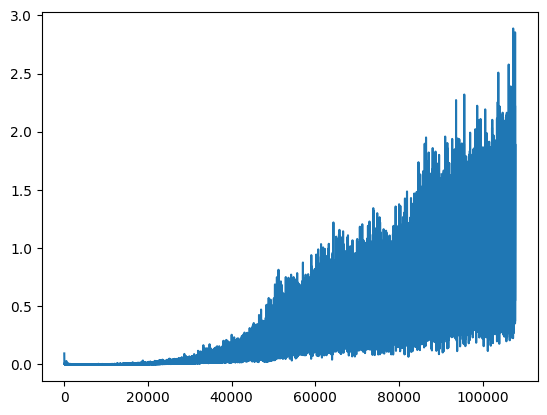

In [30]:
plt.plot(agent1.loss_list)